Часть 1

4.1 Написать функцию формирования порождающей и проверочной 
матриц расширенного кода Голея (24,12,8).

4.2. Провести исследование расширенного кода Голея для одно-, двух-, 
трёх- и четырёхкратных ошибок.

In [ ]:
import numpy as np
from random import randint

B = np.array([
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
[1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1],
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
], dtype = int)
I = np.eye(12, dtype = int)
G = np.concatenate((I, B),axis=1 )
H = np.concatenate((I, B),axis=0 )
print("G =", G)
print("H =", H)

word=np.array([randint(0,10)%2 for i in range(len(G))])
print("word =",word)

w = np.dot(word, G)%2
print("w =",w)

error = np.zeros(len(w),dtype=int)
error[randint(0,len(w)-1)]=1
print("error =",error)
w_error = (w+error)%2
print("w_error=",w_error)



G = [[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0]]
H = [[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 1 1 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 0 1 0 1 1]
 

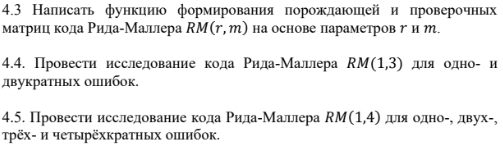

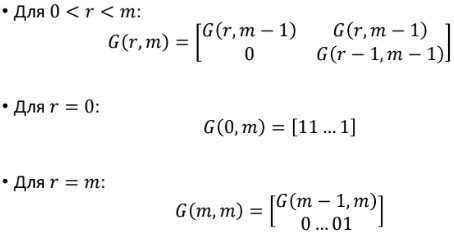

In [ ]:
import numpy as np
def G_RM(r, m):
  n=r
  k=2**m

  if (r==0):
    return np.ones((1, k))
  elif (r>0 and r<m):
    G11=G_RM(r, m-1)
    G12=G_RM(r, m-1)
    G21=np.zeros((1, len(G11[0])))
    G22=G_RM(r-1, m-1)
    G1=np.hstack((G11, G12))
    G2=np.hstack((G21, G22))
    G=np.vstack((G1, G2))
    return G
  elif r == m:
    b = np.zeros((1, k))
    b[:,-1]=1
    return np.vstack((G_RM(m-1, m), b))
G_RM(2, 2)

H = np.array([[1, 1],[1, -1]])

import numpy as ppool
def H_RM(m, H):
  res = []
  for i in range(1, m+1):
    I1 = np.eye(2**(m-i),dtype=int)
    I2 = np.eye(2**(i-1), dtype=int)
    kron_left = np.kron(I1, H)
    kron_right = np.kron(kron_left, I2)
    
    res.append(kron_right)
    
  return res

def decode(r, m, H):
  res = []
  for i in range(1, m+1):
    tmp1= []
    I1 = np.eye(2**(m-i),dtype=int)
    I2 = np.eye(2**(i-1), dtype=int)
    tmp1.append(ppool.kron(I1,H))
    res.append(ppool.kron(tmp1, I2))
    
  print(res)
    #tmp1 = [[0 for j in range(len(I1[0]) * len(I2[0]))] for i in range(len(I1) * len(I2))]
    #tmp2 = [[0 for j in range(len(I1[0]) * len(I2[0]))] for i in range(len(I1) * len(I2))]
    #for i1 in range(len(I1)):
    #    for i2 in range(len(I2)):
    #        for i3 in range(len(I1[0])):
    #            for i4 in range(len(I2[0])):
    #              tmp1[i1+i4+1][i2+i3+1]=I1[i1][i2]*H[i3][i4]
    #              tmp2[i1+i4+1][i2+i3+1]=tmp1[i1+i4+1][i2+i3+1]*I2[i3][i4]
  
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  error[randint(0,len(send_word)-1)]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  print()
  print(w_)
  
  Hi=H_RM(m, H)
  print(np.kron(w_, Hi[0]))
  w[0]=np.kron(w_, Hi[0])
  
  for m_ in range(2, m):  
    w[m_-1]=np.kron(w[m_-1], Hi[m_-1])


  max_el = w[0]
  resultI = 0
  for i, el in enumerate(w):
    if max_el < el:
        max_el = el
        resultI = i
  #max_number = max(w[m-1])

  if max>0:
    decode_word = "1"+(bin(resultI))
  else:
    decode_word = "0"+(bin(resultI))


decode(2, 2, H)




[array([[[ 1,  1,  0,  0],
        [ 1, -1,  0,  0],
        [ 0,  0,  1,  1],
        [ 0,  0,  1, -1]]]), array([[[ 1,  0,  1,  0],
        [ 0,  1,  0,  1],
        [ 1,  0, -1,  0],
        [ 0,  1,  0, -1]]])]
word = [0 1 0 1 1 1 1 0 1 1 0 0]
w = [0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1]
error = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
error+word  [0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1]

[-1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1]
[[-1 -1  0  0  1  1  0  0 -1 -1  0  0  1  1  0  0  1  1  0  0  1  1  0  0
   1  1  0  0 -1 -1  0  0  1  1  0  0  1  1  0  0 -1 -1  0  0 -1 -1  0  0
   1  1  0  0  1  1  0  0  1  1  0  0 -1 -1  0  0  1  1  0  0  1  1  0  0
   1  1  0  0 -1 -1  0  0  1  1  0  0 -1 -1  0  0 -1 -1  0  0  1  1  0  0]
 [-1  1  0  0  1 -1  0  0 -1  1  0  0  1 -1  0  0  1 -1  0  0  1 -1  0  0
   1 -1  0  0 -1  1  0  0  1 -1  0  0  1 -1  0  0 -1  1  0  0 -1  1  0  0
   1 -1  0  0  1 -1  0  0  1 -1  0  0 -1  1  0  0  1 -1  0

ValueError: ignored

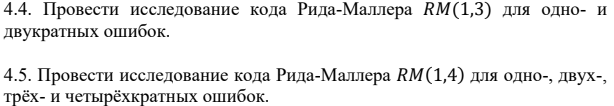

In [ ]:
#таблицу синдромов для всех однократных и двукратных ошибок
def syndromes1_2(G,H):
    
    k=len(G)
    n=len(H)

    #однократ
    table_1_syndroms={}

    for i in range(2**(n-k)):
        l = int(bin(i)[2:])
        word=[0 for s in range(k)]
        m=len(word)-1
        while (l>0 and m>0):
            word[m]=l%10
            l=l//10
            m-=1
        word=np.dot(word,G)%2
        for i1 in range(len(word)):
            error = [0 for s in range(len(word))]
            error[i1]=1
            word1=word.copy()
            word1[i1]+=1
            word1[i1]=word1[i1]%2
            word1=np.dot(word1,H)%2
            #if word1.tolist() not in table_1_syndroms:
            key=0
            for v in range(len(word1)):
              key=key*10+word1[v]
            table_1_syndroms[key]=error
    print("syndromes ", table_1_syndroms)


    ##двукрат
    #table_2_syndroms=[]
    #for i in range(2**(n-k)):
    #    l = int(bin(i)[2:])
    #    word=[0 for s in range(k)]
    #    m=len(word)-1
    #    while (l>0):
    #        word[m]=l%10
    #        l=l//10
    #        m-=1
    #    word=np.dot(word,G)%2
    #    for p in range(len(word)):
    #        for y in range(len(word)):
    #            word2=word.copy()
    #            word2[p]+=1
    #            word2[p]=word2[p]%2
    #            word2[y]+=1
    #            word2[y]=word2[y]%2
    #            word2=np.dot(word2,H)%2
    #            table_2_syndroms.append(word2.tolist())
#
    #table_3_syndroms=[]
    #for i in range(2**(n-k)):
    #    l = int(bin(i)[2:])
    #    word=[0 for s in range(k)]
    #    m=len(word)-1
    #    while (l>0):
    #        word[m]=l%10
    #        l=l//10
    #        m-=1
    #    word=np.dot(word,G)%2
    #    for p in range(len(word)):
    #        for y in range(len(word)):
    #          for u in range(len(word)):
    #            word3=word.copy()
    #            word3[p]+=1
    #            word3[p]=word3[p]%2
    #            word3[y]+=1
    #            word3[y]=word3[y]%2
    #            word3[u]+=1
    #            word3[u]=word3[u]%2
    #            word3=np.dot(word3,H)%2
    #            table_3_syndroms.append(word3.tolist())
    #table_4_syndroms=[]
    #for i in range(2**(n-k)):
    #    l = int(bin(i)[2:])
    #    word=[0 for s in range(k)]
    #    m=len(word)-1
    #    while (l>0):
    #        word[m]=l%10
    #        l=l//10
    #        m-=1
    #    word=np.dot(word,G)%2
    #    for i1 in range(len(word)):
    #        for i2 in range(len(word)):
    #          for i3 in range(len(word)):
    #            for i4 in range(len(word)):
    #              word4=word.copy()
    #              word4[i1]+=1
    #              word4[i1]=word4[i1]%2
    #              word4[i2]+=1
    #              word4[i2]=word4[i2]%2
    #              word4[i3]+=1
    #              word4[i3]=word4[i3]%2
    #              word4[i4]+=1
    #              word4[i4]=word4[i4]%2
    #              word4=np.dot(word4,H)%2
    #              table_4_syndroms.append(word4.tolist())
    #"""table_3_syndroms=[]
    #for i1 in range(len(H)):
    #  for i2 in range(i1+1, len(H)):
    #    for i3 in range(i2+1, len(H)):
    #      table_3_syndroms.append(H[i1] + H[i2] + H[i3])
    #table_4_syndroms=[]
    #for i in range(len(H)):
    #  for i1 in range(i+1, len(H)):
    #    for j in range(i1+1, len(H)):
    #      for j1 in range(j+1, len(H)):
    #        table_4_syndroms.append(H[i] + H[i1] + H[j] + H[j1]) """
    #
    return table_1_syndroms#, table_2_syndroms, table_3_syndroms, table_4_syndroms

def syndromes(H, word):
  return np.dot(word,H)%2

#Сформировать кодовое слово длины n из слова длины k. Внести
#однократную ошибку в сформированное слово. Вычислить синдром,
#исправить ошибку с использованием таблицы синдромов. Убедиться
#в правильности полученного слова.
def generate_check_1word(G,H,one_s):
    from random import randint
    k=len(G)
    n=len(H)
    word=np.array([randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    error_number[randint(0,len(word)-1)]=1
    print ("error - ",error_number)
    word = (word + error_number)%2

    print("word+error",word)

    ind=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    word = (word + one_s[key_syndrom])%2

    test = np.dot(word, H) % 2
    print("check ", test)

    print("correct word ", word[:k])

#двухкратная ошибка
def generate_check_2word(G,H,one_s):
    from random import randint
    k=len(G)
    n=len(H)
    word=np.array([randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    print ("error - ",error_number)
    word = (word + error_number)%2

    print("word+error",word)

    ind=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    if key_syndrom in one_s: 
      word = (word + one_s[key_syndrom])%2

      test = np.dot(word, H) % 2
      print("check ", test)

      print("correct word ", word[:k])
    else:
      print("syndrom not found in check table")


#трёхкратная ошибка 
def generate_check_3word(G,H,one_s):
    k=len(G)
    n=len(H)
    word=np.array([random.randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = random.randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = random.randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = random.randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    
    number_of_error_3 = random.randint(0,len(word)-1)
    while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
        number_of_error_3 = random.randint(0,len(word)-1)
    error_number[number_of_error_3]=1
    
    print ("error3 ",error_number)
    word = (word + error_number)%2

    print("word+error3 ",word)

    ind1=ind2=ind3=-1 #если вдруг инд=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    if key_syndrom in one_s: 
      word = (word + one_s[key_syndrom])%2
    
      test = np.dot(word, H) % 2
      print("check ", test)

      print("correct word ", word[:k])
    else:
      print("syndrom not found in check table")

#четырёхкратная ошибка 
def generate_check_4word(G,H,one_s):
    k=len(G)
    n=len(H)
    word=np.array([random.randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = random.randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = random.randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = random.randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    
    number_of_error_3 = random.randint(0,len(word)-1)
    while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
        number_of_error_3 = random.randint(0,len(word)-1)
    error_number[number_of_error_3]=1
    
    number_of_error_4=random.randint(0,len(word)-1)
    while number_of_error_4 == number_of_error or number_of_error_4 == number_of_error_2 or number_of_error_4 == number_of_error_3:
        number_of_error_4 = random.randint(0,len(word)-1)
    error_number[number_of_error_4]=1

    print ("error3 ",error_number)
    word = (word + error_number)%2

    print("word+error3 ",word)

    ind1=ind2=ind3=-1 #если вдруг инд=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    if key_syndrom in one_s: 
      word = (word + one_s[key_syndrom])%2
    
      test = np.dot(word, H) % 2
      print("check ", test)

      print("correct word ", word[:k])
    else:
      print("syndrom not found in check table")


def research1(r, x_matrix):
    #однократные ошибки
    n=(2**r)-1
    k=(2**r)-r-1
    
    G = Hamming_generate_matrix(r, x_matrix)
    print("G:\n", G, '\n')

    H = Hamming_checking_matrix(r, x_matrix)
    print("H ", r, '\n', H, '\n')

    #таблица синдромов 1
    one_s=syndromes1_2(G,H)
    
    print("\none-time mistakes")
    generate_check_1word(G,H,one_s)

    #двухкратные ошибки
    print("\ndouble mistakes")
    generate_check_2word(G,H,one_s)

    #трёхкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)

    #четырехкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)


def research2(r, x_matrix):
    #однократные ошибки
    n=(2**r)-1
    k=(2**r)-r-1
    
    G = Hamming_advanced_generate_matrix(r, x_matrix)
    print("G:\n", G, '\n')

    H = Hamming_advanced_checking_matrix(r, x_matrix)
    print("H ", r, '\n', H, '\n')

    #таблица синдромов 1
    one_s=syndromes1_2(G,H)
    
    print("\none-time mistakes")
    generate_check_1word(G,H,one_s)

    #двухкратные ошибки
    print("\ndouble mistakes")
    generate_check_2word(G,H,one_s)

    #трёхкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)

    #четырёхкратные ошибки
    print("\nfour-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_4word(G,H,one_s)


print("#2")
research1(2, x_3_1)
research1(3, x_7_4)
research1(4, x_15_11) ##########?
print("\n#4")
research2(2, x_3_1)
research2(3, x_7_4)
research2(4, x_15_11)

NUMBER 1

In [ ]:
import numpy as np
import random 

def syndromes(G, H):
    return np.dot(H, G) % 2

def syndromes1_2(G,H):
    
    k=len(G)
    n=len(H)

    #однократ
    table_1_syndroms={}

    for i in range(2**(n-k)):
        l = int(bin(i)[2:])
        word=[0 for s in range(k)]
        m=len(word)-1
        while (l>0 and m>0):
            word[m]=l%10
            l=l//10
            m-=1
        word=np.dot(word,G)%2
        for i1 in range(len(word)):
            error = [0 for s in range(len(word))]
            error[i1]=1
            word1=word.copy()
            word1[i1]+=1
            word1[i1]=word1[i1]%2
            word1=np.dot(word1,H)%2
            #if word1.tolist() not in table_1_syndroms:
            key=0
            for v in range(len(word1)):
              key=key*10+word1[v]
            table_1_syndroms[key]=error
    #print("syndromes ", table_1_syndroms)
    return table_1_syndroms


def generate_check_1word(G,H):
    from random import randint
    k=len(G)
    n=len(H)
    word=np.array([randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    error_number[randint(0,len(word)-1)]=1
    print ("error - ",error_number)
    word = (word + error_number)%2
    print("word+error",word)
    return word

#двухкратная ошибка
def generate_check_2word(G,H):
    from random import randint
    k=len(G)
    n=len(H)
    word=np.array([randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    print ("error - ",error_number)
    word = (word + error_number)%2

    print("word+error",word)
    return word
    


#трёхкратная ошибка 
def generate_check_3word(G,H):
    k=len(G)
    n=len(H)
    word=np.array([random.randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = random.randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = random.randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = random.randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    
    number_of_error_3 = random.randint(0,len(word)-1)
    while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
        number_of_error_3 = random.randint(0,len(word)-1)
    error_number[number_of_error_3]=1
    
    print ("error3 ",error_number)
    word = (word + error_number)%2

    print("word+error3 ",word)
    return word
    

#четырёхкратная ошибка 
def generate_check_4word(G,H):
    k=len(G)
    n=len(H)
    word=np.array([random.randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = random.randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = random.randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = random.randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    
    number_of_error_3 = random.randint(0,len(word)-1)
    while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
        number_of_error_3 = random.randint(0,len(word)-1)
    error_number[number_of_error_3]=1
    
    number_of_error_4=random.randint(0,len(word)-1)
    while number_of_error_4 == number_of_error or number_of_error_4 == number_of_error_2 or number_of_error_4 == number_of_error_3:
        number_of_error_4 = random.randint(0,len(word)-1)
    error_number[number_of_error_4]=1

    print ("error3 ",error_number)
    word = (word + error_number)%2

    print("word+error3 ",word)
    return word
    


def research1(G,H):

    #таблица синдромов 1
    one_s=syndromes1_2(G,H)
    
    print("\none-time mistakes")
    generate_check_1word(G,H,one_s)

    #двухкратные ошибки
    print("\ndouble mistakes")
    generate_check_2word(G,H,one_s)

    #трёхкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)

    #четырехкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)


def research2(G,H):

    #таблица синдромов 1
    #one_s=syndromes1_2(G,H)
    
    print("\none-time mistakes")
    word=generate_check_1word(G,H)

    error = check_error(G,H,word)
    if error !=-1:
      full_error = np.concatenate((error[0],error[1]))
    
      word = (word + full_error)%2
      print (word[:12])

    #двухкратные ошибки
    print("\ndouble mistakes")
    word_with_2_errors = generate_check_2word(G,H)

    error = check_error(G,H,word_with_2_errors)
    if error !=-1:
      full_error = np.concatenate((error[0],error[1]))
    
      word = (word_with_2_errors + full_error)%2
      print (word[:12])

    #трёхкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    word_with_3_errors = generate_check_3word(G,H)

    error = check_error(G,H,word_with_3_errors)
    if error !=-1:
      full_error = np.concatenate((error[0],error[1]))
    
      word = (word_with_3_errors + full_error)%2
      print (word[:12])

    #четырёхкратные ошибки
    print("\nfour-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    word_with_4_errors = generate_check_4word(G,H)

    error = check_error(G,H,word_with_4_errors)
    if error !=-1:
      
      full_error = np.concatenate((error[0],error[1]))
    
      word = (word_with_4_errors + full_error)%2
      print (word[:12])




def check_error(G,H,word):
  syndrome = np.dot(word,H)%2
  count_of_ones = sum(syndrome)
  if count_of_ones<=3:
    return [syndrome,np.zeros(12,dtype=int)]
  ind=0
  min_syndrome=syndrome
  for i in range(len(B)):
    temp=(syndrome+B[i])%2
    if sum(temp)<sum(min_syndrome):
      min_syndrome = temp
      ind=i
  if sum(min_syndrome)<=2:
    mas=np.zeros(12,dtype=int)
    mas[ind] = 1
    return [min_syndrome,mas]
  syndrome_sB = np.dot(syndrome,B)%2
  count_of_ones_sB = sum(syndrome_sB)
  if count_of_ones_sB <=3:
    return [np.zeros(12,dtype=int),syndrome_sB]
  for i in range(len(B)):
    temp=(syndrome_sB+B[i])%2
    if sum(temp)<sum(min_syndrome):
      min_syndrome = temp
      ind=i
  if sum(min_syndrome)<=2:
    mas=np.zeros(12,dtype=int)
    mas[ind] = 1
    return [mas,syndrome_sB]
  print("error not found")
  return -1

#part 2
def genetrate_G_RM(r,m):
  if r==0:
    return np.array([1 for i in range(2**m)])
  if r==m:
    mas = np.array([0 for i in range(2**m)])
    mas[-1]=1
    return np.array([genetrate_G_RM(m-1,m),mas])
  if r>0 and r<m:
    return np.array([[genetrate_G_RM(r,m-1),genetrate_G_RM(r,m-1)],[np.array([0 for i in range(2**(m//2))]),genetrate_G_RM(r-1,m-1)]])

B = np.array([
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
[1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1],
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
], dtype = int)
I = np.eye(12, dtype = int)
G = np.concatenate((I, B),axis=1 )
H = np.concatenate((I, B),axis=0 )
#print("G =", G)
#print("H =", H)

research2(G,H)
#check_error(G,H,word)
#G_RM = genetrate_G_RM(1,2)
#print(G_RM)


one-time mistakes
word  [0 1 0 0 0 1 0 1 0 1 0 1]
send word  [0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0]
error -  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
word+error [0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0]
[0 1 0 0 0 1 0 1 0 1 0 1]

double mistakes
word  [0 0 1 1 1 1 1 0 1 0 1 0]
send word  [0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1]
error -  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
word+error [0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1]
[0 0 1 1 1 1 1 0 1 0 1 0]

three-fold mistakes
word  [1 0 1 1 1 1 1 0 1 1 1 0]
send word  [1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1]
error3  [0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
word+error3  [1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1]
[1 0 1 1 1 1 1 0 1 1 1 0]

four-fold mistakes
word  [1 0 0 1 1 1 0 1 0 0 0 0]
send word  [1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1]
error3  [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
word+error3  [1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 

NUMBER 2

In [ ]:
import numpy as np
from random import randint
def G_RM(r, m):
  n=r
  k=2**m

  if (r==0):
    return np.ones((1, k))
  elif (r>0 and r<m):
    G11=G_RM(r, m-1)
    G12=G_RM(r, m-1)
    G22=G_RM(r-1, m-1)
    
    G21=np.zeros((len(G22), len(G11[0])))
    
    G1=np.hstack((G11, G12))

    
    G2=np.hstack((G21, G22))
    
    G=np.vstack((G1, G2))
    return G
  elif r == m:
    b = np.zeros((1, k))
    b[:,-1]=1
    return np.vstack((G_RM(m-1, m), b))
G=G_RM(1, 3)

H = np.array([[1, 1],[1, -1]])

import numpy as ppool
def H_RM(i, m, H):
  res = []
  I1 = np.eye(2**(m-i),dtype=int)
  I2 = np.eye(2**(i-1), dtype=int)
  kron_left = np.kron(I1, H)
  kron_right = np.kron(kron_left, I2)
    
  res.append(kron_right)
    
  return kron_right

def decode(r, m, H):
  G=G_RM(r,m)
  
  print("one-time mistakes")
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  error[randint(0,len(send_word)-1)]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  w=[]
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  w.append(np.dot(w_, H_RM(1,m, H)))
  for m_ in range(1, m): 
    w.append(np.dot(w[m_-1], H_RM(m_+1,m, H)))
  
  max_el = w[-1][0]
  resultI = 0
  for i in range(len(w[-1])):
    if abs(max_el) < abs(w[-1][i]):
        max_el = w[-1][i]
        resultI = i
        
  binary_code =  str(bin(resultI)[2:])
  while len(binary_code)<len(G)-1:
    binary_code = '0'+binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse+=binary_code[i]
  if max_el>0:
    decode_word = "1"+binary_code_reverse
  else:
    decode_word = "0"+binary_code_reverse
  print(decode_word)

  #two_error
  print('double mistakes')
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  number_of_error = randint(0,len(send_word)-1)
  error[number_of_error]=1
  number_of_error_2 = randint(0,len(send_word)-1)
  while number_of_error_2 == number_of_error:
      number_of_error_2 = randint(0,len(send_word)-1)
      
  error[number_of_error_2]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  w=[]
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  w.append(np.dot(w_, H_RM(1,m, H)))
  for m_ in range(1, m): 
    w.append(np.dot(w[m_-1], H_RM(m_+1,m, H)))
  
  max_el = w[-1][0]
  resultI = 0
  for i in range(len(w[-1])):
    if abs(max_el) < abs(w[-1][i]):
        max_el = w[-1][i]
        resultI = i
        
  binary_code =  str(bin(resultI)[2:])
  while len(binary_code)<len(G)-1:
    binary_code = '0'+binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse+=binary_code[i]
  if max_el>0:
    decode_word = "1"+binary_code_reverse
  else:
    decode_word = "0"+binary_code_reverse
  print(decode_word)

  


def decode2(r, m, H):
  G=G_RM(r,m)
  
  print("one-time mistakes")
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  error[randint(0,len(send_word)-1)]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  w=[]
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  w.append(np.dot(w_, H_RM(1,m, H)))
  for m_ in range(1, m): 
    w.append(np.dot(w[m_-1], H_RM(m_+1,m, H)))
  
  max_el = w[-1][0]
  resultI = 0
  for i in range(len(w[-1])):
    if abs(max_el) < abs(w[-1][i]):
        max_el = w[-1][i]
        resultI = i
        
  binary_code =  str(bin(resultI)[2:])
  while len(binary_code)<len(G)-1:
    binary_code = '0'+binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse+=binary_code[i]
  if max_el>0:
    decode_word = "1"+binary_code_reverse
  else:
    decode_word = "0"+binary_code_reverse
  print(decode_word)

  #two_error
  print('double mistakes')
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  number_of_error = randint(0,len(send_word)-1)
  error[number_of_error]=1
  number_of_error_2 = randint(0,len(send_word)-1)
  while number_of_error_2 == number_of_error:
      number_of_error_2 = randint(0,len(send_word)-1)
      
  error[number_of_error_2]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  w=[]
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  w.append(np.dot(w_, H_RM(1,m, H)))
  for m_ in range(1, m): 
    w.append(np.dot(w[m_-1], H_RM(m_+1,m, H)))
  
  max_el = w[-1][0]
  resultI = 0
  for i in range(len(w[-1])):
    if abs(max_el) < abs(w[-1][i]):
        max_el = w[-1][i]
        resultI = i
        
  binary_code =  str(bin(resultI)[2:])
  while len(binary_code)<len(G)-1:
    binary_code = '0'+binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse+=binary_code[i]
  if max_el>0:
    decode_word = "1"+binary_code_reverse
  else:
    decode_word = "0"+binary_code_reverse
  print(decode_word)

  #three_error
  print('three-fold mistakes')
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  number_of_error = randint(0,len(send_word)-1)
  error[number_of_error]=1
  number_of_error_2 = randint(0,len(send_word)-1)
  while number_of_error_2 == number_of_error:
      number_of_error_2 = randint(0,len(send_word)-1)
  error[number_of_error_2]=1

  number_of_error_3 = randint(0,len(send_word)-1)
  while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
      number_of_error_3 = randint(0,len(send_word)-1)
  error[number_of_error_3]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  w=[]
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  w.append(np.dot(w_, H_RM(1,m, H)))
  for m_ in range(1, m): 
    w.append(np.dot(w[m_-1], H_RM(m_+1,m, H)))
  
  max_el = w[-1][0]
  resultI = 0
  for i in range(len(w[-1])):
    if abs(max_el) < abs(w[-1][i]):
        max_el = w[-1][i]
        resultI = i
        
  binary_code =  str(bin(resultI)[2:])
  while len(binary_code)<len(G)-1:
    binary_code = '0'+binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse+=binary_code[i]
  if max_el>0:
    decode_word = "1"+binary_code_reverse
  else:
    decode_word = "0"+binary_code_reverse
  print(decode_word)


  #four_error
  print('four-fold mistakes')
  word=np.array([randint(0,10)%2 for i in range(len(G))])
  print("word =",word)

  send_word = np.dot(word, G)%2
  print("w =",send_word )

  error = np.zeros(len(send_word),dtype=int)
  number_of_error = randint(0,len(send_word)-1)
  error[number_of_error]=1
  number_of_error_2 = randint(0,len(send_word)-1)
  while number_of_error_2 == number_of_error:
      number_of_error_2 = randint(0,len(send_word)-1)
  error[number_of_error_2]=1

  number_of_error_3 = randint(0,len(send_word)-1)
  while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
      number_of_error_3 = randint(0,len(send_word)-1)
  error[number_of_error_3]=1

  number_of_error_4 = randint(0,len(send_word)-1)
  while number_of_error_4 == number_of_error or number_of_error_4 == number_of_error_2 or number_of_error_4 == number_of_error_3:
      number_of_error_4 = randint(0,len(send_word)-1)
  error[number_of_error_4]=1
  print("error =",error)
  w_error = (send_word+error)%2
  print("error+word ",w_error)

  w_=w_error.copy()
  w=np.zeros((len(w_), m), dtype=int)
  w=[]
  
  for i in range(len(w_)):
    if (w_[i] == 0):
      w_[i]=-1
  w.append(np.dot(w_, H_RM(1,m, H)))
  for m_ in range(1, m): 
    w.append(np.dot(w[m_-1], H_RM(m_+1,m, H)))
  
  max_el = w[-1][0]
  resultI = 0
  for i in range(len(w[-1])):
    if abs(max_el) < abs(w[-1][i]):
        max_el = w[-1][i]
        resultI = i
       
  binary_code =  str(bin(resultI)[2:])
  while len(binary_code)<len(G)-1:
    binary_code = '0'+binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse+=binary_code[i]
  if max_el>0:
    decode_word = "1"+binary_code_reverse
  else:
    decode_word = "0"+binary_code_reverse
  print(decode_word)


#print(H_RM(1,3,H))
decode(2, 4, H)
#print('\n\n\n\n\nG(1,4)\n\n\n\n\n')
decode2(2,4,H)

one-time mistakes
word = [1 1 0 1 1 0 0 0 1 1 0]
w = [1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
error = [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
error+word  [1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
11110000000
double mistakes
word = [1 0 0 0 0 0 1 0 0 0 1]
w = [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
error = [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
error+word  [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.]
10101000000
one-time mistakes
word = [0 1 1 1 1 0 0 1 1 1 1]
w = [0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
error = [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
error+word  [0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
10000000000
double mistakes
word = [1 0 0 1 0 1 1 1 1 0 0]
w = [1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
error = [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
error+word  [1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
01100000000
three-fold mistakes
word = [0 0 0 1 0 1 1 1 1 0 0]
w = [0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.]
error = [0 0 1 0 0 0 0 